In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



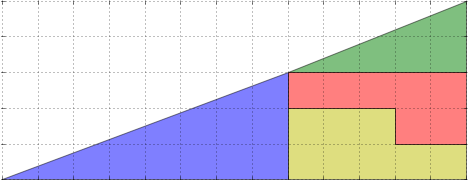
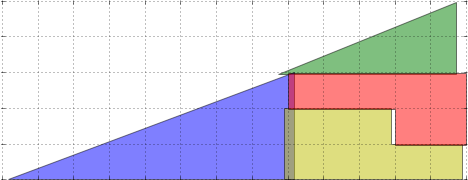
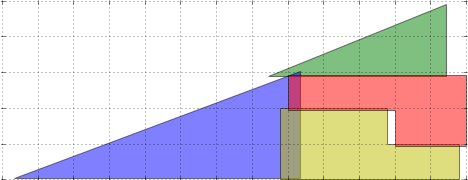
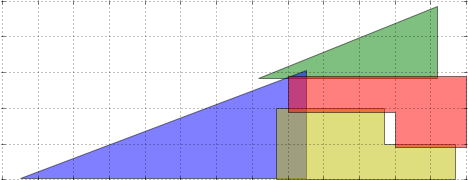
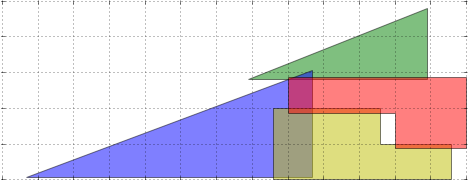
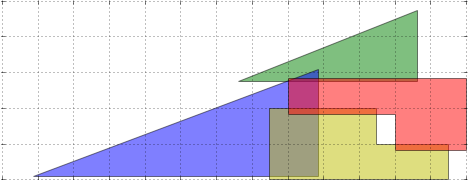
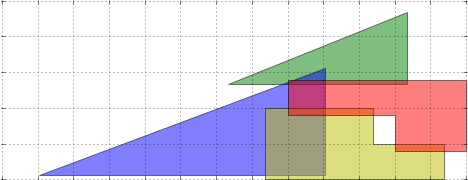
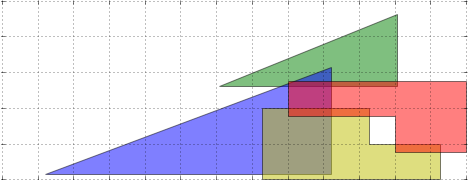
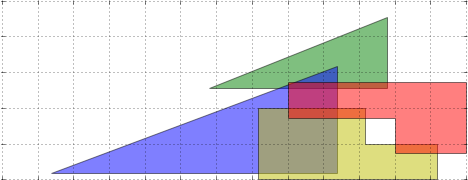
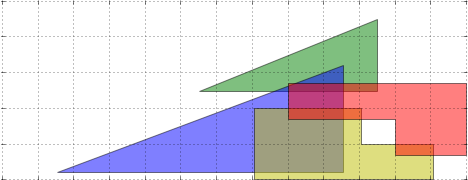
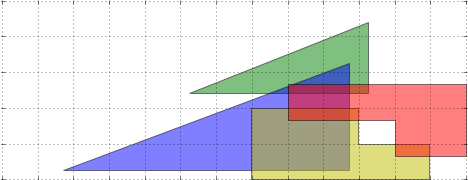
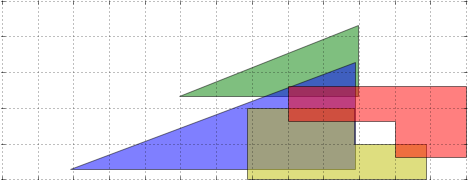
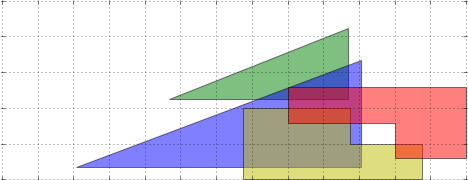
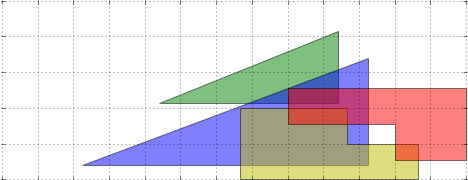
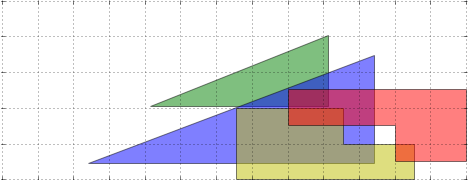
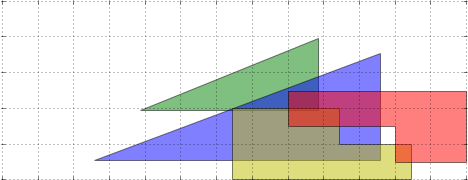
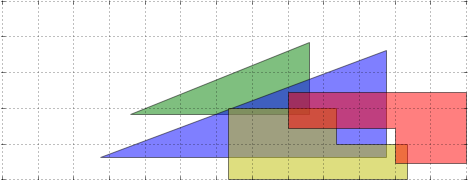
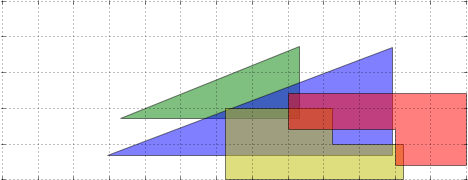
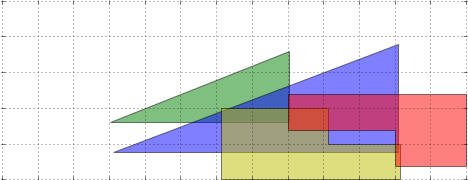
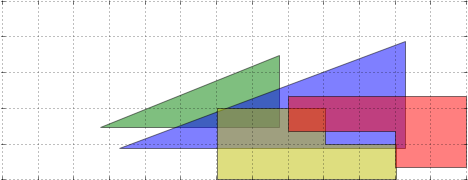
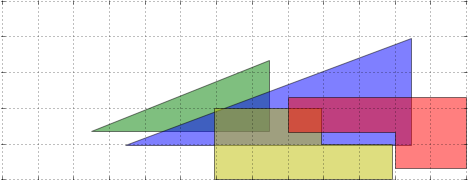
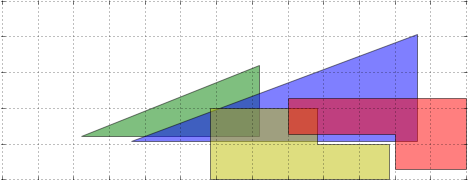
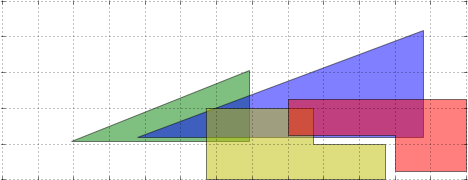
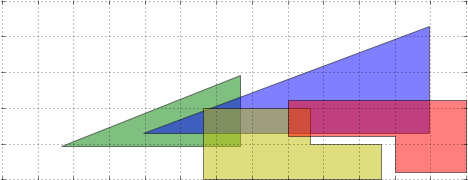
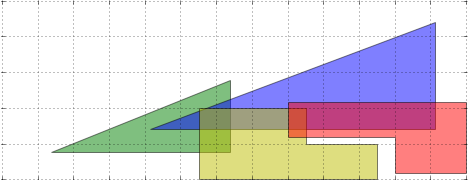
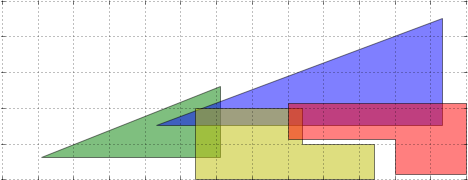
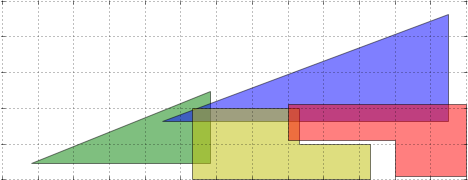
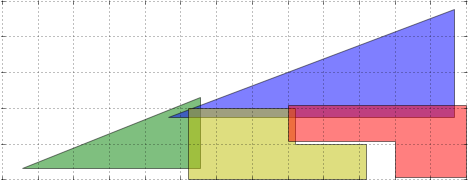
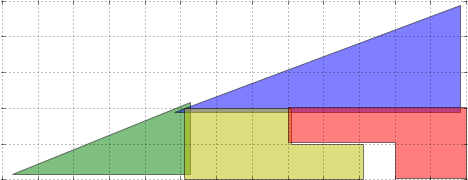
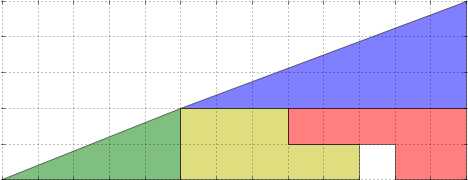

In [2]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

# Set up the axes, making sure the axis ratio is equal
fig = plt.figure(figsize=(6.5, 2.5))
ax = fig.add_axes([0, 0, 1, 1], xlim=(-0.02, 13.02), ylim=(-0.02, 5.02),
                  xticks=range(14), yticks=range(6), aspect='equal', frameon=False)
ax.grid(True)

# Define the shapes of the polygons
P1 = np.array([[0, 0], [5, 0], [5, 2], [0, 0]])
P2 = np.array([[0, 0], [8, 0], [8, 3], [0, 0]])
P3 = np.array([[0, 0], [5, 0], [5, 1], [3, 1], [3, 2], [0, 2], [0, 0]])
P4 = np.array([[0, 1], [3, 1], [3, 0], [5, 0], [5, 2], [0, 2], [0, 1]])

# Draw the empty polygons for the animation
kwds = dict(ec='k', alpha=0.5)
patches = [ax.add_patch(plt.Polygon(0 * P1, fc='g', **kwds)),
           ax.add_patch(plt.Polygon(0 * P2, fc='b', **kwds)),
           ax.add_patch(plt.Polygon(0 * P3, fc='y', **kwds)),
           ax.add_patch(plt.Polygon(0 * P4, fc='r', **kwds))]

# This function moves the polygons as a function of the frame i
Nframes = 30
def animate(nframe):
    f = nframe / (Nframes - 1.0)
    patches[0].set_xy(P1 + (8 - 8 * f, 3 - 3 * f + 0.5 * np.sin(f * np.pi)))
    patches[1].set_xy(P2 + (5 * f, 2 * f - 0.5 * np.sin(f * np.pi)))
    patches[2].set_xy(P3 + (8 - 3 * f, 0))
    patches[3].set_xy(P4 + (8, 1 - f))
    return patches
    
anim = animation.FuncAnimation(fig, animate, frames=Nframes, interval=50)
display_animation(anim, default_mode='once')

In [3]:
def animate_as_gif(nframe):
    if nframe >= Nframes and nframe < Nframes + 15:
        nframe = Nframes - 1
    elif nframe >= Nframes + 15 and nframe < 2 * Nframes + 15:
        nframe = 2 * Nframes + 14 - nframe
    elif nframe >= 2 * Nframes + 15:
        nframe = 0
    return animate(nframe)
    
anim = animation.FuncAnimation(fig, animate_as_gif,
                               frames=2 * Nframes + 30, interval=50)
anim.save('MagicTriangle.gif', writer='imagemagick')

<img src = "MagicTriangle.gif"></img>